## Quantum computing (Deutsch’s algorithm)

### -> Comparison of quantum computing and classical computing

#### Quantum computing
1. Quantum computers process information in a fundamentally different way to classical computers. Instead of relying on transistors — quantum computers use qubits, which can represent both 0 and 1 simultaneously. 
2. A quantum computer’s power grows exponentially in relation to the number of qubits linked together. This differs from a conventional computer. This is one reason why quantum computers could eventually handle some types of calculations much better than classical computers.
3. Though quantum computers could drastically outperform classical computers at some tasks — such as optimizing delivery routes or simulating a chemical reaction — they are difficult to build and there are lots of types of calculation where they aren’t expected to offer many advantages.

#### Classical computing
1. Classical computers process information on transistors, which can represent either the “1” or the “0” of binary information at a single time.
2. A classical computer’s power grows in a 1:1 relationship with the numbers of transistor, which sees its power increase in direct proportion to the number of transistor.
3. Classical computer have low error rates and can operate at room temp, most everyday processing will likely be better handled by classical computers even when powerful quantum computers begin to emerge.

### The Deutsch Algorithm

The problem solved by the Deutsch algorithm is the following. We are given a device that computes some function f:{0,1}→{0,1}. We can think of the device as a black box or “oracle”.This means that we can apply the circuit to obtain values of f(x) for given inputs x, but we cannot gain any information about the inner workings of the circuit to learn about the function f. There are 4 possible functions from {0,1} to {0,1}, f0, f1, f2 and f3.

f(x) is constant (fi(0)=fi(1)) or balanced (fi(0)≠fi(1))

The problem is to determine the value of fi(0)⊕fi(1). If we determine that f(0)⊕f(1)=0, then we know that f is constant (f(0)=f(1)). If f(0)⊕f(1)=1 then we know that f is balanced (f(0)≠f(1)). In particular f0 and f3 are constant and f1 and f2 are balanced.

Classically, two evaluations or query of the function are necessary to answer the question. If only one evaluation is permitted, the function could still be either constant or balanced regardless of the input and output obtained.

The Deutsch algorithm is a quantum algorithm capable of determining the value of fi(0)⊕fi(1) by making only a single query to a quantum oracle for f.

The oracle can be expressed as a unitary operator

Uf|x>A|y>B=|x>A|y⊕f(x)>B

In [1]:
#!pip install qiskit
#!pip install pylatexenc

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ, BasicAer
from qiskit.visualization import plot_bloch_multivector,plot_bloch_vector, plot_histogram
from qiskit.quantum_info import Statevector
import numpy as np 
import matplotlib
#The QasmSimulator backend is designed to mimic an actual device. It executes a Qiskit QuantumCircuit and returns a count dictionary containing the final values of any classical registers in the circuit.

/home/webtunix/.local/lib/python3.6/site-packages/qiskit/__init__.py:66: DeprecationWarning: Using Qiskit with Python 3.6 is deprecated as of qiskit-terra 0.17.0. Support for running Qiskit with Python 3.6 will be removed in qiskit-terra 0.20.0.
  DeprecationWarning,


In [3]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024

In [4]:
style = {'backgroundcolor': 'lightyellow'} # Style of the circuits

In [5]:
qreg1 = QuantumRegister(2) # The quantum register of the qubits, in this case 2 qubits
register1 = ClassicalRegister(1) 

qc = QuantumCircuit(qreg1, register1)

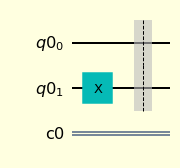

In [6]:
#Initial state
qc.x(1)
qc.barrier()
qc.draw(output='mpl', style=style) 

The initial state is|0>|0>,we apply the x gate to the second qubit and obtain |ψ0>=|0>|1>
|ψ0>AB=|0>AX|0>B=|0>A|1>B

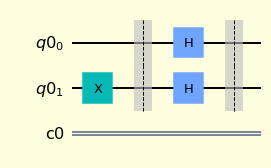

In [7]:
# Apply Hadamard gates
qc.h(0)
qc.h(1)
qc.barrier()
qc.draw(output='mpl', style=style) 

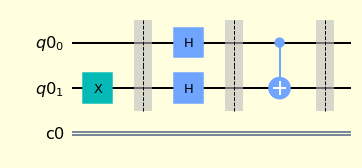

In [8]:
# Implemented a balanced oracle (CNOT)
qc.cx(0,1)
qc.barrier()
qc.draw(output='mpl', style=style) 

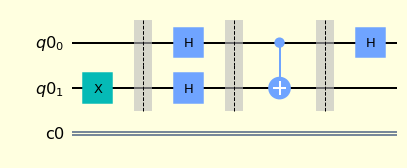

In [9]:
# Apply the Hadamard gate to the first (A) qubit
qc.h(0)
qc.draw(output='mpl', style=style) 

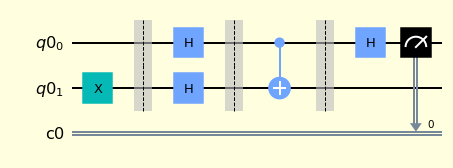

In [10]:
# The probability of measure |1>A in the first qubit is 1. Confirming that CNOT is a balacend oracle.
qc.measure(qreg1[0],register1)
qc.draw(output='mpl', style=style) 

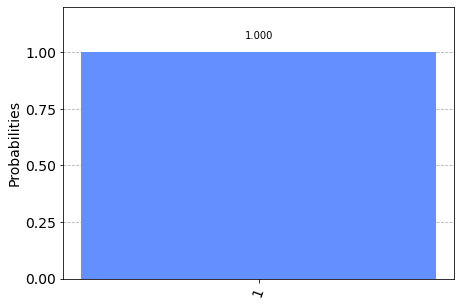

In [11]:
# Execute and get counts
results = execute(qc, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer) # In below result, As expected we obtain 1 with probability 1

#### Putting all together in a function

In [12]:

# Balanced oracle 1 : CNOT
def oracleBalance1(qcir):
    qcir.cx(0,1)
    qcir.barrier()
    
    return qcir 

In [13]:
# Balanced oracle 2 : CNOT (I⊗x)
def oracleBalance2(qcir):
    qcir.x(1)
    qcir.cx(0,1)
    qcir.barrier()
    
    return qcir 

In [14]:
# Constant oracle 1: (I⊗x)
def oracleConstant1(qcir):
    
    qcir.x(1)
    qcir.barrier()
    
    return qcir 

In [15]:
# Constant oracle 2: (I⊗I)
def oracleConstant2(qcir):
    
    qcir.barrier()
    
    return qcir 

In [16]:
# Function to determine if a oracle is constant of balanced
def deutsch(oracle):
    
    Qreg = QuantumRegister(2)
    Creg = ClassicalRegister(1) 
    qcirc = QuantumCircuit(Qreg, Creg)
    
    qcirc.x(1)
    
    qcirc.h(0)
    qcirc.h(1)
    qcirc.barrier()
    
    qcirc = oracle(qcirc)
    
    qcirc.h(0)
    qcirc.barrier()
    
    qcirc.measure(Qreg[0],Creg)
   
    return qcirc

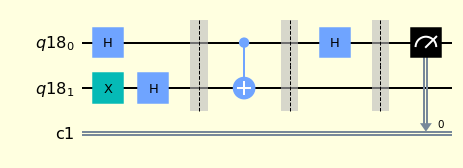

In [17]:
# Balanced oracle 1

resultBalanced1 = deutsch(oracleBalance1)
resultBalanced1.draw(output='mpl', style=style)

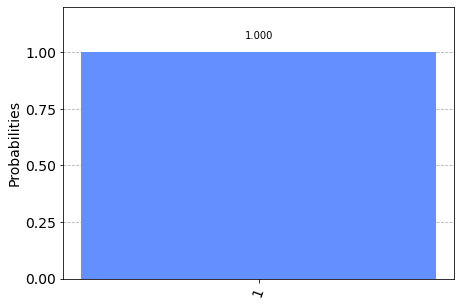

In [18]:
resultsB1 = execute(resultBalanced1, backend=backend, shots=shots).result()
answerB1 = resultsB1.get_counts()

plot_histogram(answerB1)

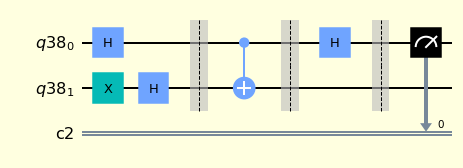

In [19]:
# Balanced oracle 2

resultBalanced2 = deutsch(oracleBalance1)
resultBalanced2.draw(output='mpl', style=style)

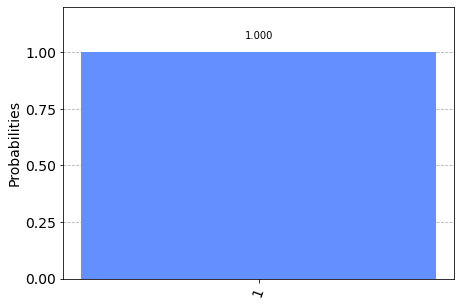

In [20]:
resultsB2 = execute(resultBalanced2, backend=backend, shots=shots).result()
answerB2 = resultsB2.get_counts()

plot_histogram(answerB2)

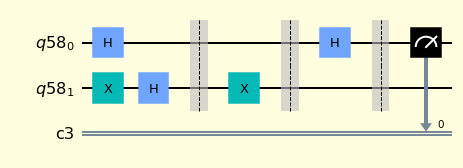

In [21]:
# Constant oracle 1

resultConstant1 = deutsch(oracleConstant1)
resultConstant1.draw(output='mpl', style=style) 

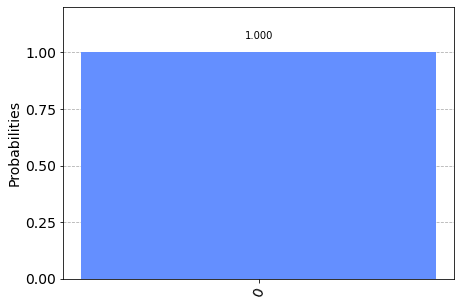

In [22]:
resultsC1= execute(resultConstant1, backend=backend, shots=shots).result()
answerC1 = resultsC1.get_counts()

plot_histogram(answerC1)

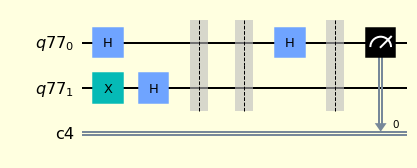

In [23]:
#Constant oracle 2

resultConstant2 = deutsch(oracleConstant2)
resultConstant2.draw(output='mpl', style=style) 

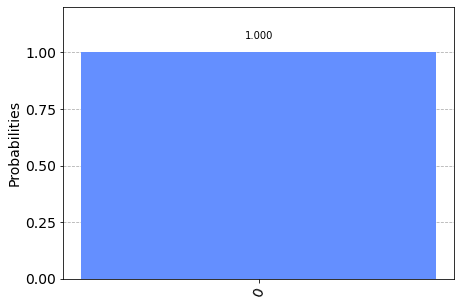

In [24]:
resultsC2= execute(resultConstant2, backend=backend, shots=shots).result()
answerC2 = resultsC2.get_counts()

plot_histogram(answerC2)